**Avatars IDs**

- Mens US ASTM Sz M/40, MALE ID: "b4ec391f-4a63-41ad-8efd-f3e45c75bb28"

- Womens US ASTM Sz M/6, FEMALE ID: "ad80d4fd-cf03-4337-b42a-8df04ea07bcc"

# *Compute new positions of the garment*

In [1]:
import json
import math

#IMPORT SCENE
rute = 'store_state_transformed.json'

with open(rute) as archivo:
    data = json.load(archivo)

# Avatar & Pieces geometry data
avatar = data["avatar"]
pieces = data["pieces"]

#print("Avatar", avatar)

all_pieces_indices = []
all_pieces_position3d = []
all_pieces_position2d = []

all_sewLines = []
all_pieces_position2d = []

# Rotation
def rotate_point(x, y, theta):
    x_rotated = x * math.cos(theta) - y * math.sin(theta)
    y_rotated = x * math.sin(theta) + y * math.cos(theta)
    return x_rotated, y_rotated

for piece in data['pieces']:
    indices = piece['components']['garmentPiece']['geometry']['indices']
    position3D = piece['components']['garmentPiece']['geometry']['position3D']
    position2D = piece['components']['garmentPiece']['geometry']['position2D']    
    # Ajusta la rotación a pi/2 o -pi/2
    if round(piece['components']['transform2D']['rotation'] / (math.pi / 2)) * (math.pi / 2) > 0:
        rotation = math.pi / 2
    else:
        rotation = -math.pi / 2

    translation = piece['components']['transform2D']['translation']
    sewLine = piece['components']['garmentPiece']['sewLine']['path']    

    all_pieces_indices.extend(indices)
    all_pieces_position3d.extend(position3D)

    #GET PIECE 2D COORDINATES ROTATED & TRANSLATED
    for i in range(0, len(position2D), 2):

        x = position2D[i]
        y = position2D[i + 1]
        
        # Rotation
        x_rotated, y_rotated = rotate_point(x, y, rotation)

        # Translation
        x_translated = x_rotated + translation['x']
        y_translated = y_rotated + translation['y']
        
        # Update 2d coordinates
        position2D[i] = x_translated
        position2D[i + 1] = y_translated
    all_pieces_position2d.append({'garmentPiece_id': piece['_id'], 'position2D': position2D})

    for point in sewLine:
        x = point['position']['x']
        y = point['position']['y']
        
        # Rotar el punto
        x_rotated, y_rotated = rotate_point(x, y, rotation)
        
        # Aplicar translación
        x_translated = x_rotated + translation['x']
        y_translated = y_rotated + translation['y']
        
        # Actualizar las coordenadas del punto
        point['position']['x'] = x_translated
        point['position']['y'] = y_translated
        if 'control1' in point:
            # Rotar el punto de control1
            x_c1 = point['control1']['x']
            y_c1 = point['control1']['y']
            x_rotated_c1, y_rotated_c1 = rotate_point(x_c1, y_c1, rotation)
            
            # Aplicar translación al punto de control1 rotado
            x_translated_c1 = x_rotated_c1 + translation['x']
            y_translated_c1 = y_rotated_c1 + translation['y']
            
            # Actualizar las coordenadas del punto de control1
            point['control1']['x'] = x_translated_c1
            point['control1']['y'] = y_translated_c1

        if 'control2' in point:
            # Rotar el punto de control2
            x_c2 = point['control2']['x']
            y_c2 = point['control2']['y']
            x_rotated_c2, y_rotated_c2 = rotate_point(x_c2, y_c2, rotation)
            
            # Aplicar translación al punto de control2 rotado
            x_translated_c2 = x_rotated_c2 + translation['x']
            y_translated_c2 = y_rotated_c2 + translation['y']
            
            # Actualizar las coordenadas del punto de control2
            point['control2']['x'] = x_translated_c2
            point['control2']['y'] = y_translated_c2
    all_sewLines.append({'garmentPiece_id': piece['_id'], 'sewLine': sewLine})


transformed_poms = []

# ALL POMS TRANSFORMED POSITIONS
for pom in data["poms"]:

    garment_piece_id = pom["garmentPieceId"]

    # TRANSFORM associated with pom
    for piece in data['pieces']:
        if piece['_id'] == garment_piece_id:
            rotation = piece['components']['transform2D']['rotation']
            translation = piece['components']['transform2D']['translation']
            break

    # POM COORDS
    pom_coords = [(point["position"]["x"], point["position"]["y"]) for point in pom["position"]["_path"]]
    transformed_pom_coords = []
    for x, y in pom_coords:
        # Rotation
        x_rotated, y_rotated = rotate_point(x, y, rotation)
        # Translation
        x_translated = x_rotated + translation['x']
        y_translated = y_rotated + translation['y']
        transformed_pom_coords.append((x_translated, y_translated))
    transformed_poms.append(transformed_pom_coords)
        

print("Pieces", len(all_pieces_position3d)/3)
print("Pieces", all_pieces_position2d)


Pieces 8895.0
Pieces [{'garmentPiece_id': '661c20b39565d2501311a089', 'position2D': [-0.8024697529775202, 1.652154212584481, -0.812469743440777, 1.652154212584481, -0.8224697488051951, 1.652154212584481, -0.8324697541696131, 1.652154212584481, -0.8424697595340311, 1.652154212584481, -0.852469749997288, 1.652154212584481, -0.862469755361706, 1.652154212584481, -0.872469760726124, 1.652154212584481, -0.8824697511893809, 1.652154212584481, -0.8924697565537989, 1.652154212584481, -0.9024697470170557, 1.652154212584481, -0.9124697523814738, 1.652154212584481, -0.9224697502953112, 1.652154212584481, -0.9324697482091486, 1.652154212584481, -0.9424697535735667, 1.652154212584481, -0.9524697440368235, 1.652154212584481, -0.9624697494012415, 1.652154212584481, -0.9724697622162402, 1.652154212584481, -0.982469752679497, 1.652154212584481, -0.9924697505933344, 1.652154212584481, -1.0024697410565913, 1.652154212584481, -1.0124697464210093, 1.652154212584481, -1.0224697517854273, 1.652154212584481, 

In [2]:
import numpy as np

#Convert to numpy arrays & matrix
avatar_indices = np.array(avatar["indices"])
avatar_positions = np.array(avatar["positions"]).reshape(-1, 3)  # 3 colum matrix 

pieces_indices = np.array(all_pieces_indices)
pieces_positions = np.array(all_pieces_position3d).reshape(-1, 3)  # 3 colum matrix 
pieces_positions2d = np.array(all_pieces_position2d)
bezier_2d = np.array(all_sewLines)
pieces_bezierPath = np.array(all_sewLines)

print(pieces_bezierPath)


[{'garmentPiece_id': '661c20b39565d2501311a089', 'sewLine': [{'position': {'x': -0.8024697529775202, 'y': 1.634628211846337}, 'type': 'LINE', '_id': '6601616da0216e4eb0a5a3b9'}, {'position': {'x': -0.8024697529775202, 'y': 1.652154212584481}, 'type': 'SEWING', '_id': '6601616da0216e4eb0a5a3ba'}, {'position': {'x': -1.2324697601300776, 'y': 1.652154212584481}, 'type': 'SEWING', '_id': '6601616da0216e4eb0a5a3bb'}, {'position': {'x': -1.2324697601300776, 'y': 1.634628211846337}, 'type': 'LINE', '_id': '6601616da0216e4eb0a5a3bc'}, {'position': {'x': -1.2324697601300776, 'y': 1.6171022111081932}, 'type': 'SEWING', '_id': '6601616da0216e4eb0a5a3bd'}, {'position': {'x': -0.8024697529775202, 'y': 1.6171022111081932}, 'type': 'SEWING', '_id': '6601616da0216e4eb0a5a3be'}]}
 {'garmentPiece_id': '661c20b39565d2501311a09d', 'sewLine': [{'position': {'x': -0.4455405619973488, 'y': 1.410045785275729}, 'type': 'SEWING', '_id': '6601616da0216e4eb0a5a3c9'}, {'position': {'x': -0.5996812653774567, 'y': 1

In [3]:
# Compute min distances garment-avatar
min_distances = np.zeros(len(pieces_positions))
ac = np.zeros(len(pieces_positions), dtype=int) # Avatar Correspondences

# For all vertex in the garment
for i, pos_prenda in enumerate(pieces_positions):
    dist_vertex = np.linalg.norm(pos_prenda - avatar_positions, axis=1)
    # Find nearest avatar index and compute min distance
    nearest_indice_vertex = np.argmin(dist_vertex)
    min_dist = dist_vertex[nearest_indice_vertex]
    #print(distancias_vertice[indice_vertice_cercano])

    # Save min distances and avatar index correspondences
    min_distances[i] = min_dist
    ac[i] = nearest_indice_vertex



In [4]:
# Offset between garment vertex and its nearest avatar vertex
offsets = np.zeros_like(pieces_positions)

for i, indice_avatar in enumerate(ac):
    offset = np.array(pieces_positions[i])- np.array(avatar_positions[indice_avatar])  
    offsets[i]=offset

#print(offsets)



New Avatar

In [5]:
#IMPORT NEW AVATAR
avatars = 'avatars.json'

with open(avatars) as file:
    avatars_data = json.load(file)
new_avatar = avatars_data["male"]

new_avatar_positions= np.array(new_avatar["positions"]).reshape(-1, 3)  # 3d colum matrix


In [6]:
#Compute new pieces positions with the offset computed and its nearest avatar index from the new avatar (Avatars in seddi have the same mesh)
new_pieces_positions = np.zeros_like(pieces_positions)

for i, indice_avatar in enumerate(ac):
    new_pieces_positions[i] = np.array(new_avatar_positions[indice_avatar]) + np.array(offsets[i])

print(new_pieces_positions)


[[-0.04744132  1.54602671 -0.00532557]
 [-0.0411139   1.5459547  -0.01360062]
 [-0.03587867  1.54504418 -0.02186953]
 ...
 [-0.37381473  1.4398644  -0.00889958]
 [-0.33013988  1.37572181 -0.08939229]
 [-0.34073368  1.28964603 -0.00448709]]


In [7]:
#Export SCENE TO JSON for AUTHOR

import json
#IMPORT SCENE
rute = 'store_state_transformed.json'

with open(rute) as archivo:
    data = json.load(archivo)


pieces = data["pieces"]
new_list_positions = new_pieces_positions.reshape(-1).tolist()

for piece in data['pieces']:
    indices = piece['components']['garmentPiece']['geometry']['indices']
    positions = piece['components']['garmentPiece']['geometry']['position3D']

    # Len atucal piece
    length_piece = len(positions)
    # Get new positions actual piece
    new_positions = new_list_positions[:length_piece]

    # Remplace for new positions
    piece['components']['garmentPiece']['geometry']['position3D'] = new_positions
    
    # Update new_pieces_positions to next piece
    new_list_positions = new_list_positions[length_piece:]

with open("output.json", "w") as outfile: 
      json.dump(data, outfile)
print("Datos exportados a 'output.json'")

Datos exportados a 'output.json'


DEFORMATION METRICS FOR 2D PATTERN

POM: C0: -0.6383009735288347 0.9578646409909573 C1: -0.06359579124865206 0.957861884898801


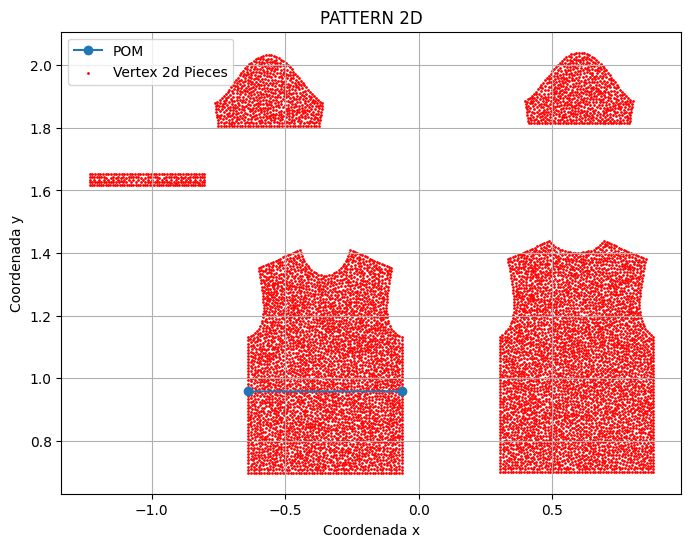

In [8]:
#Vertex defined by POM POINTS
import matplotlib.pyplot as plt


#GET POMS COORDINATES
class Coordinates:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

poms = data["poms"]
#print(transformed_poms[0][0][0])
pom_C0=Coordinates(transformed_poms[0][0][0],transformed_poms[0][0][1])
pom_C1=Coordinates(transformed_poms[0][1][0],transformed_poms[0][1][1])


POM = transformed_poms
print("POM:","C0:",pom_C0.x,pom_C0.y,"C1:",pom_C1.x,pom_C1.y)

#print(pieces_positions2d)
pieces_2d = []
for piece_data in pieces_positions2d:
    position2d = piece_data['position2D']
    for i in range(0, len(position2d), 2):
        x = position2d[i]
        y = position2d[i + 1]
        pieces_2d.append(Coordinates(x, y))


# PLOT
plt.figure(figsize=(8, 6))

plt.plot([pom_C0.x, pom_C1.x], [pom_C0.y, pom_C1.y], marker='o', label='POM')


plt.scatter([position.x for position in pieces_2d], 
            [position.y for position in pieces_2d], 
            color='red',s=1, label='Vertex 2d Pieces')


plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('PATTERN 2D')
plt.legend()

plt.grid(True)
plt.show()





[0.23739983 0.06638591 0.14759104 ... 0.12499176 0.1197504  0.15033975]
[0.008653626146275932, 0.009890701648344513, 0.011970040431854645, 0.009448176814161971, 0.008653626146275932, 0.012595977951609086, 0.008684978579583903, 0.010179481221942547, 0.01345414709391154, 0.010103465112417451, 0.008684978579583903, 0.013385143394023982, 0.014377891506971455, 0.012600565608090676, 0.012416256922095914, 0.013346548470762474, 0.009560796028362017, 0.010961736140999994, 0.01366438387078707, 0.00947850364372252, 0.010961286520140633, 0.009683891603310069, 0.01368210638379279, 0.008662604426362209, 0.014514555940687653, 0.017601429143681274, 0.010934474949925, 0.0093089010654939, 0.012886696447047392, 0.008898001206742117, 0.013091042188357086, 0.009850301704638638, 0.012575886029599855, 0.010599657714030122, 0.0127969470341783, 0.009163333861879872, 0.014317078518190357, 0.0177014564918516, 0.0109960559187281, 0.014233946758939657, 0.0178751799135063, 0.011405458481422385, 0.013876107689503729

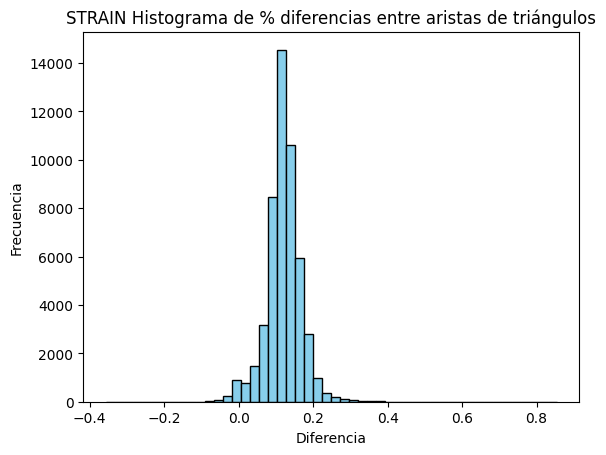

50859


In [9]:
#COMPUTE DEFORMATION METRIC 3D: EDGE LENGTH

def compute_edge_lengths(points, indices):
    edge_lengths = []
    for i in range(0, len(indices), 3):
        # Obtener los índices de los puntos que forman el triángulo
        p1_index, p2_index, p3_index = indices[i], indices[i+1], indices[i+2]

        # Obtener las posiciones 3D de los puntos del triángulo
        p1 = points[p1_index]
        p2 = points[p2_index]
        p3 = points[p3_index]

        # Calcular la longitud de cada arista usando np.linalg.norm
        edge_ab = np.linalg.norm(p2 - p1)
        edge_bc = np.linalg.norm(p3 - p2)
        edge_ca = np.linalg.norm(p1 - p3)

        edge_lengths.append(edge_ab)
        edge_lengths.append(edge_bc)
        edge_lengths.append(edge_ca)

    return edge_lengths

def compute_edge_difference(avatar1_lengths, avatar2_lengths):
    if len(avatar1_lengths) != len(avatar2_lengths):
        raise ValueError("AVATARS NEED SAME NUMBER OF EDGES.")
    
    differences = np.abs(np.array(avatar1_lengths) - np.array(avatar2_lengths))
    return differences
    
def compute_edge_strain(edge_length, original_edge_length):

    return edge_length / original_edge_length - 1

def compute_total_strain(avatar1_lengths, avatar2_lengths):
    total_strain = []
    for edge_length, original_length in zip(avatar2_lengths, avatar1_lengths):
        strain = compute_edge_strain(edge_length, original_length)
        total_strain.append(strain)
    
    return np.array(total_strain)

avatar1_3dpoints = pieces_positions
avatar2_3dpoints = new_pieces_positions

# COMPUTE EDGE LENGTHS Avatar 1 & Avatar 2
avatar1_edge_lengths = compute_edge_lengths(avatar1_3dpoints,pieces_indices)
avatar2_edge_lengths = compute_edge_lengths(avatar2_3dpoints,pieces_indices)

# Compute the difference in edge lengths between the two avatars
diff_edges = compute_edge_difference(avatar1_edge_lengths, avatar2_edge_lengths)

target_strain = compute_total_strain(np.array(avatar1_edge_lengths), np.array(avatar2_edge_lengths)).flatten()
print(compute_total_strain(np.array(avatar1_edge_lengths), np.array(avatar2_edge_lengths)))
print(avatar1_edge_lengths)
print("Diferencia en longitudes de aristas entre los dos avatares:")

# Crear el histograma
plt.hist(target_strain, bins=50, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.title('STRAIN Histograma de % diferencias entre aristas de triángulos')

# Mostrar el histograma
plt.show()

print(len(target_strain))

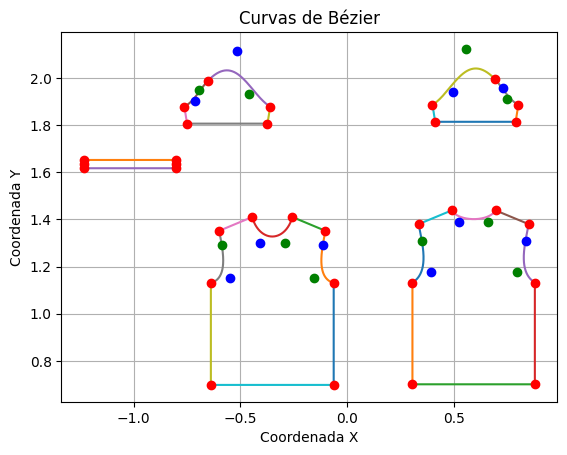

8068


In [10]:
import numpy as np
import torch
def find_intersection_points(bezier_curve, ray, orientation):
    intersection_points = []
    if(orientation=='horizontal'):

        for i in range(len(bezier_curve) - 1):
            # Check for intersection between line segment and ray
            y1, y2 = bezier_curve[i][1], bezier_curve[i+1][1]
            if (y1 >= ray and y2 <= ray) or (y1 <= ray and y2 >= ray):
                # Interpolate x value at intersection point
                t = (ray - y1) / (y2 - y1)
                intersection_x = bezier_curve[i][0] + t * (bezier_curve[i+1][0] - bezier_curve[i][0])
                intersection_points.append((intersection_x, ray))
        return intersection_points
    else:     
        for i in range(len(bezier_curve) - 1):
        # Obtener coordenadas x de los puntos del segmento
            x1, x2 = bezier_curve[i][0], bezier_curve[i+1][0]
            
            # Verificar si el segmento intersecta con la línea vertical
            if (x1 >= ray and x2 <= ray) or (x1 <= ray and x2 >= ray):
                # Interpolar el valor y en el punto de intersección
                t = (ray - x1) / (x2 - x1)
                intersection_y = bezier_curve[i][1] + t * (bezier_curve[i+1][1] - bezier_curve[i][1])
                intersection_points.append((ray, intersection_y))
        return intersection_points

def closest_points_to_P(intersection_points, P, orientation):
    if(orientation=='horizontal'):
        left_point, right_point = None, None
        min_dist_left, min_dist_right = float('inf'), float('inf')
        for point in intersection_points:
            dist = np.linalg.norm(np.array(P) - np.array(point))
            if point[0] < P[0] and dist < min_dist_left:
                left_point = point
                min_dist_left = dist
            elif point[0] > P[0] and dist < min_dist_right:
                right_point = point
                min_dist_right = dist

        return left_point, right_point
    else:
        above_point, below_point = None, None
        min_dist_above, min_dist_below = float('inf'), float('inf')
        for point in intersection_points:
            dist = np.linalg.norm(np.array(P) - np.array(point))
            # Verificar si el punto está arriba o abajo de P en el eje y
            if point[1] > P[1] and dist < min_dist_above:
                above_point = point
                min_dist_above = dist
            elif point[1] < P[1] and dist < min_dist_below:
                below_point = point
                min_dist_below = dist
        return above_point, below_point


def nearest_indices(array_nearest, array_points):
    indices = []
    for point in array_nearest:
        # Calcular las distancias entre el punto actual y todos los puntos en array_points
        distances = np.linalg.norm(array_points - point, axis=1)
        # Encontrar el índice del punto más cercano
        nearest_index = np.argmin(distances)
        indices.append(nearest_index)
    return indices


def boundary_points(intersection_points, point_left):
    # Calcular las distancias euclidianas entre los puntos de intersección y point_left
    distances = np.linalg.norm(intersection_points - np.array([point_left[0], point_left[1]]), axis=1)
    
    # Obtener los índices de los puntos más cercanos (ordenados de menor a mayor distancia)
    nearest_indices = np.argsort(distances)
    
    # Tomar los dos puntos más cercanos
    nearest_boundary_points = [intersection_points[i] for i in nearest_indices[:2]]
    
    return nearest_boundary_points


def calculate_angle(point1, point2):
    """
    Calcula el ángulo entre dos puntos y el eje x.
    """
    dx = point2[0] - point1[0]
    dy = point2[1] - point1[1]
    return np.arctan2(dy, dx)

def reorder_indices(reference_points, P):
    """
    Reordena los índices de los puntos de referencia en función del ángulo con el punto P.
    """
    angles = [calculate_angle(P, point) for point in reference_points]
    indices = np.argsort(angles)
    return indices




def is_convex_quadrilateral(points):
    """
    Verifica si los puntos forman un cuadrilátero convexo.
    """
    def cross_product(p1, p2, p3):
        """
        Calcula el producto cruzado de dos vectores formados por los puntos p1, p2, y p3.
        """
        return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

    n = len(points)
    for i in range(n):
        # Calcula el producto cruzado para cada tripleta de puntos adyacentes
        j = (i + 1) % n
        k = (i + 2) % n
        cross = cross_product(points[i], points[j], points[k])
        # Si el producto cruzado es negativo, indica que los puntos no están en orden convexo
        if cross < 0:
            return False
    return True


def calculate_weights(points, P):
    x_p, y_p = P
    weights = []
    for x, y in points:
        distance = np.sqrt((x - x_p)**2 + (y - y_p)**2)
        weights.append(1 / distance)  # Inverse distance weighting
    total_weight = sum(weights)
    return [w / total_weight for w in weights]  # Normalize weights


def bilinear_interpolation(points, weights):
    interpolated_x = sum(w * x for w, (x, _) in zip(weights, points))
    interpolated_y = sum(w * y for w, (_, y) in zip(weights, points))
    return interpolated_x,interpolated_y

def bilinear_interpolation_tensor(points, weights):

    interpolated_x = torch.sum(weights * points[:, 0])
    interpolated_y = torch.sum(weights * points[:, 1])
    interpolated_point = torch.stack([interpolated_x, interpolated_y])

    return interpolated_point

def vertex_weights_nearest_points(P, orientation, bezier_curve, points_inside_array):
    #plt.figure(figsize=(8, 6))

    if orientation == 'horizontal':
        ray = P[1]

    else:
        ray = P[0]

    intersection_points = find_intersection_points(bezier_curve, ray, orientation)

    left_point, right_point = closest_points_to_P(intersection_points, P, orientation)


    nearest_boundary_points_left = boundary_points(points_inside_array, left_point)
    nearest_boundary_points_right = boundary_points(points_inside_array, right_point)
    nearest_boundary_points = nearest_boundary_points_left + nearest_boundary_points_right

    nearest_indices_of_points = nearest_indices(nearest_boundary_points, points_inside_array)

    reordered_indices = reorder_indices(points_inside_array[nearest_indices_of_points], P)

    reordered_nearest_indices_of_points = [nearest_indices_of_points[i] for i in reordered_indices]


    weights = calculate_weights(points_inside_array[reordered_nearest_indices_of_points], P)

    return weights, reordered_nearest_indices_of_points


def plot_bezier_curves(bezier_2d):
    # Función para calcular el punto en la curva de Bézier
    def bezier(t, P0, P1=None, P2=None, P3=None):
        if P1 is None or P2 is None:
            # Si solo hay dos puntos, calcula la interpolación lineal
            return [(1-t)*P0[i] + t*P3[i] for i in range(2)]
        else:
            # Si hay cuatro puntos, calcula la curva de Bézier
            return [(1-t)**3 * P0[i] + 3 * (1-t)**2 * t * P1[i] + 3 * (1-t) * t**2 * P2[i] + t**3 * P3[i] for i in range(2)]

    # Crear figura y ejes una vez
    plt.figure()
    ax = plt.gca()
    all_curves_points = []

    # Iterar sobre cada elemento en bezier_2d
    for bezier_data in bezier_2d:
        sewLine = bezier_data['sewLine']
        
        # Generar valores de t (parámetro)
        t_values = np.linspace(0, 1, 2000)

        # Iterar sobre cada par de puntos en sewLine
        for i in range(len(sewLine) - 1):
            P0 = [sewLine[i]['position']['x'], sewLine[i]['position']['y']]
            P3 = [sewLine[i+1]['position']['x'], sewLine[i+1]['position']['y']]
            
            if 'control1' in sewLine[i] and 'control2' in sewLine[i]:
                P1 = [sewLine[i]['control1']['x'], sewLine[i]['control1']['y']]
                P2 = [sewLine[i]['control2']['x'], sewLine[i]['control2']['y']]
            else:
                P1 = None
                P2 = None
            
            curve_points = np.array([bezier(t, P0, P1, P2, P3) for t in t_values])
            all_curves_points.append(curve_points)

            ax.plot(curve_points[:,0], curve_points[:,1], label=f'Curva {i+1} de Bézier')

        # Unir el último punto con el primero
        P0_last = [sewLine[0]['position']['x'], sewLine[0]['position']['y']]
        P3_first = [sewLine[-1]['position']['x'], sewLine[-1]['position']['y']]

        if 'control1' in sewLine[-1] and 'control2' in sewLine[-1]:
            P2_first = [sewLine[-1]['control1']['x'], sewLine[-1]['control1']['y']]
            P1_first = [sewLine[-1]['control2']['x'], sewLine[-1]['control2']['y']]
        else:
            P1_first = None
            P2_first = None

        # Verificamos si hay puntos de control y los incluimos en el cálculo
        if P1_first is not None and P2_first is not None:
            curve_points = np.array([bezier(t, P0_last, P1_first, P2_first, P3_first) for t in t_values])
        else:
            curve_points = np.array([bezier(t, P0_last, None, None, P3_first) for t in t_values])
        all_curves_points.append(curve_points)

        ax.plot(curve_points[:,0], curve_points[:,1], label=f'Curva cerrada de Bézier')
        # Añadir puntos de control y primeros y últimos puntos
        for i, point in enumerate(sewLine):
            ax.plot(point['position']['x'], point['position']['y'], 'ro', label=f'Punto {i}')
            if 'control1' in point:
                ax.plot(point['control1']['x'], point['control1']['y'], 'go', label=f'Control 1 {i}')
            if 'control2' in point:
                ax.plot(point['control2']['x'], point['control2']['y'], 'bo', label=f'Control 2 {i}')

    # Personalizar la leyenda
    #ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Configurar ejes y etiquetas
    ax.set_xlabel('Coordenada X')
    ax.set_ylabel('Coordenada Y')
    ax.set_title('Curvas de Bézier')
    ax.grid(True)

    # Mostrar la gráfica
    plt.show()
    return all_curves_points



# Convertir points_inside a un array NumPy para facilitar la manipulación
all_curve_points = plot_bezier_curves(bezier_2d)


boundary_curves= np.concatenate(all_curve_points, axis=0)

points_inside = []

# Umbral de distancia
threshold = 0.001  # Puedes ajustar este valor según tus necesidades

# Iterar sobre los objetos Coordinates en pieces_2d
for coord in pieces_2d:
    # Coordenadas x e y del objeto Coordinates
    x = coord.x
    y = coord.y
    
    # Calcular la distancia euclidiana entre el punto (x, y) y cada punto en boundary_curves
    distances = np.linalg.norm(boundary_curves - np.array([x, y]), axis=1)
    
    # Verificar si alguna de las distancias es menor que el umbral
    if any(distances < threshold):
        points_inside.append((x, y))
points_inside_array = np.array(points_inside)
points_array = []

for piece_data in pieces_positions2d:
    position2d = piece_data['position2D']
    for i in range(0, len(position2d), 2):
        x = position2d[i]
        y = position2d[i + 1]
        point = [x, y]
        if not np.any(np.all(points_inside_array == point, axis=1)):
            points_array.append(point)

print(len(points_array))


In [11]:
import math
import copy
import torch

def calcular_desplazamiento_tensor(p1, p2, orientacion, diferencia_longitud):
    ajuste_mitad =  diferencia_longitud / 2

    if orientacion == 1:
        ajuste_mitad = diferencia_longitud

    desplazamiento_x = ajuste_mitad
    desplazamiento_y = ajuste_mitad

    if orientacion == 0:

        desplazamiento_y = 0
    elif orientacion == 1:
        desplazamiento_x = 0
        
    elif orientacion == 2:
      dx = p2.x - p1.x
      dy = p2.y - p1.y
      dist = math.sqrt(dx * dx + dy * dy)

      ux = math.abs(dx / dist)
      uy = dy / dist


      direccionOriginal = { x: ux, y: uy }

      desplazamiento_x = direccionOriginal.x * ajuste_mitad
      desplazamiento_y= direccionOriginal.y * ajuste_mitad

    return desplazamiento_x, desplazamiento_y


# Llamar a la función para graficar las curvas de Bézier

def bezier(t, P0, P1, P2, P3):
    return (1 - t)**3 * P0 + 3 * (1 - t)**2 * t * P1 + 3 * (1 - t) * t**2 * P2 + t**3 * P3

# Función para encontrar el segmento y el parámetro t de un punto en las curvas de Bézier
def find_segment_and_t(all_curve_points, point):
    """
    Encuentra el segmento y el parámetro t de un punto en las curvas de Bézier.

    Args:
    all_curve_points (list): Lista de puntos de las curvas de Bézier.
    point (list): Coordenadas [x, y] del punto a buscar.

    Returns:
    tuple: El índice del segmento y el valor de t correspondiente.
    """
    # Inicializar las variables para el punto más cercano y su distancia mínima
    closest_point = None
    min_distance = float('inf')
    segment_index = -1
    
    # Iterar sobre cada conjunto de puntos de las curvas de Bézier
    for index, curve_points in enumerate(all_curve_points):
        # Calcular la distancia euclidiana entre el punto dado y cada punto en la curva de Bézier
        distances = np.linalg.norm(curve_points - point, axis=1)
        
        # Encontrar el punto más cercano en la curva de Bézier
        closest_index = np.argmin(distances)
        closest_distance = distances[closest_index]
        
        # Si la distancia al punto más cercano es menor que la mínima registrada hasta ahora, actualizar
        if closest_distance < min_distance:
            closest_point = curve_points[closest_index]
            min_distance = closest_distance
            segment_index = index
    
    # Calcular el valor de t correspondiente al punto más cercano
    if closest_point is not None:
        t_value = np.where(np.all(all_curve_points[segment_index] == closest_point, axis=1))[0][0] / (len(all_curve_points[segment_index]) - 1)
        return segment_index, t_value
    else:
        return None, None

def bezier_curves_tensor(bezier_tensor):
                
    def bezier(t, P0, P1=None, P2=None, P3=None):
        if P1 is None or P2 is None:
            # Si solo hay dos puntos, calcula la interpolación lineal
            return torch.tensor([(1-t)*P0[i] + t*P3[i] for i in range(2)])
        else:
            # Si hay cuatro puntos, calcula la curva de Bézier
            return torch.tensor([(1-t)**3 * P0[i] + 3 * (1-t)**2 * t * P1[i] + 3 * (1-t) * t**2 * P2[i] + t**3 * P3[i] for i in range(2)])
    all_curves_points_t = []
    all_indices_t = []

    # Iterar sobre cada elemento en bezier_2d
    for garment_index, bezier_data in enumerate(bezier_tensor):
        sewLine = bezier_data['sewLine']
        # Generar valores de t (parámetro)
        t_values = torch.linspace(0, 1, 2000)

        # Iterar sobre cada par de puntos en sewLine
        for i in range(len(sewLine) - 1):
            P0 = torch.tensor([sewLine[i]['position']['x'], sewLine[i]['position']['y']])
            P3 = torch.tensor([sewLine[i+1]['position']['x'], sewLine[i+1]['position']['y']])
            
            if 'control1' in sewLine[i] and 'control2' in sewLine[i]:
                P1 = torch.tensor([sewLine[i]['control1']['x'], sewLine[i]['control1']['y']])
                P2 = torch.tensor([sewLine[i]['control2']['x'], sewLine[i]['control2']['y']])
            else:
                P1 = None
                P2 = None

            curve_points = torch.stack([bezier(t, P0, P1, P2, P3) for t in t_values])
            indices = torch.tensor([[garment_index, i]] * len(curve_points))

            all_curves_points_t.append(curve_points)
            all_indices_t.append(indices)


        # Unir el último punto con el primero
        P0_last = torch.tensor([sewLine[0]['position']['x'], sewLine[0]['position']['y']])
        P3_first = torch.tensor([sewLine[-1]['position']['x'], sewLine[-1]['position']['y']])

        if 'control1' in sewLine[-1] and 'control2' in sewLine[-1]:
            P2_first = torch.tensor([sewLine[-1]['control1']['x'], sewLine[-1]['control1']['y']])
            P1_first = torch.tensor([sewLine[-1]['control2']['x'], sewLine[-1]['control2']['y']])
        else:
            P1_first = None
            P2_first = None

        # Verificamos si hay puntos de control y los incluimos en el cálculo
        if P1_first is not None and P2_first is not None:
            curve_points = torch.stack([bezier(t, P0_last, P1_first, P2_first, P3_first) for t in t_values])
        else:
            curve_points = torch.stack([bezier(t, P0_last, None, None, P3_first) for t in t_values])
        

        indices = torch.tensor([[garment_index, i]] * len(curve_points))
        all_curves_points_t.append(curve_points)
        all_indices_t.append(indices)
        
    return torch.stack(all_curves_points_t), torch.stack(all_indices_t)



def recalculate_boundary_vertex_tensor(curv, segment_index, t_value):
    # Obtener los puntos del segmento dado
    curve_points = curv[segment_index]

    # Calcular el índice correspondiente al valor de t
    index = int(t_value * (curve_points.size(0) - 1))
    
    # Devolver las coordenadas del punto en ese índice como un tensor
    return curve_points[index]

def compute_tensor_boundary_point_tensor(curv_points_tensor, boundary_vertex_segment_t_tensor):
    recalculated_points = []
    
    # Iterar sobre los puntos dentro del tensor
    for point_info in boundary_vertex_segment_t_tensor:
        # Obtener las coordenadas del punto, el índice del segmento y el valor de t
        x, y, segment_index, t_value = point_info
        
        # Llamar a la función para recalcular el punto y agregarlo a la lista
        recalculated_point = recalculate_boundary_vertex_tensor(curv_points_tensor, segment_index.long(), t_value)
        
        # Agregar el punto recalculado directamente al tensor
        recalculated_points.append(recalculated_point)
    
    # Convertir la lista de puntos recalculados en un tensor
    recalculated_points_tensor = torch.stack(recalculated_points, dim=0)
    
    return recalculated_points_tensor


slider_Value= np.sqrt((pom_C1.x - pom_C0.x)**2 + (pom_C1.y - pom_C0.y)**2) #0.57 -> valor Slider 57cm
newSliderValue = 0.9   #Ahora quiero que sea 60cm
diferencia_longitud = newSliderValue - slider_Value
bezier_2d_copy = copy.deepcopy(bezier_2d)




In [12]:
# CALCULATE  INIT PARAMETERS TENSORS: POM, BEZIER, BOUNDARY VERTEX, INTERIOR VERTEX 


#GET BOUNDARY: boundary_vertex_segment_t_tensor &  INTERION: weights_array_tensor and nearest_boundary_vertex_array_tensor

import torch

bezier_curve = np.concatenate(all_curve_points, axis=0)

# Inicializar una lista vacía para almacenar los tensores individuales
boundary_vertex_segment_t_tensor = []
# Iterar sobre todos los puntos del borde
for point_to_find in points_inside_array:
    # Llamar a la función para encontrar el segmento y el parámetro t del punto
    segment_index, t_value = find_segment_and_t(all_curve_points, point_to_find)
    
    # Si se encuentra el punto en alguna curva de Bézier, almacenar el resultado
    if segment_index is not None:
        # Crear un tensor con los resultados actuales
        result_tensor = torch.tensor([[point_to_find[0], point_to_find[1], segment_index, t_value]], dtype=torch.float32)
        
        # Agregar el tensor de resultados a la lista
        boundary_vertex_segment_t_tensor.append(result_tensor)

# Concatenar todos los tensores individuales en un solo tensor
if boundary_vertex_segment_t_tensor:
    boundary_vertex_segment_t_tensor = torch.cat(boundary_vertex_segment_t_tensor, dim=0)

# Imprimir el tensor resultante
print("boundary_vertex_segment_t_tensor:",boundary_vertex_segment_t_tensor)

weights_array_tensor = []
nearest_boundary_vertex_array_tensor = []
recalculated_vertex_points_tensor = []
orientation = 'horizontal'


for P in points_array:
    # Calcular pesos y puntos de borde más cercanos
    weights, nearest_boundary_vertex = vertex_weights_nearest_points(P, orientation, bezier_curve, points_inside_array)
    
    # Convertir las listas de pesos y puntos de borde más cercanos en tensores
    weights_tensor = torch.tensor(weights, dtype=torch.float32)
    nearest_boundary_vertex_tensor = torch.tensor(nearest_boundary_vertex, dtype=torch.float32)
    
    # Añadir los tensores resultantes a las listas de tensores
    weights_array_tensor.append(weights_tensor)
    nearest_boundary_vertex_array_tensor.append(nearest_boundary_vertex_tensor)

# Convertir las listas de tensores a un solo tensor
if weights_array_tensor:
    weights_array_tensor = torch.stack(weights_array_tensor, dim=0)
if nearest_boundary_vertex_array_tensor:
    nearest_boundary_vertex_array_tensor = torch.stack(nearest_boundary_vertex_array_tensor, dim=0)

# Imprimir los tensores resultantes
print("weights_array_tensor", weights_array_tensor)
print("nearest_boundary_vertex_array_tensor:",nearest_boundary_vertex_array_tensor)




boundary_vertex_segment_t_tensor: tensor([[-8.0247e-01,  1.6522e+00,  0.0000e+00,  1.0000e+00],
        [-8.1247e-01,  1.6522e+00,  1.0000e+00,  2.3012e-02],
        [-8.2247e-01,  1.6522e+00,  1.0000e+00,  4.6523e-02],
        ...,
        [ 7.9531e-01,  1.8589e+00,  3.1000e+01,  3.7519e-01],
        [ 7.9689e-01,  1.8679e+00,  3.1000e+01,  2.5013e-01],
        [ 7.9847e-01,  1.8769e+00,  3.1000e+01,  1.2506e-01]])
weights_array_tensor tensor([[0.5045, 0.0215, 0.0215, 0.4525],
        [0.4646, 0.0417, 0.0417, 0.4519],
        [0.0215, 0.5045, 0.4524, 0.0215],
        ...,
        [0.2180, 0.2840, 0.2815, 0.2165],
        [0.3645, 0.1380, 0.1373, 0.3602],
        [0.0120, 0.4109, 0.5651, 0.0120]])
nearest_boundary_vertex_array_tensor: tensor([[ 45.,  99., 100.,  44.],
        [ 45.,  99., 100.,  44.],
        [ 45.,  99., 100.,  44.],
        ...,
        [778., 822., 823., 777.],
        [774., 826., 721., 773.],
        [780., 820., 821., 779.]])


tensor([-0.6383,  0.9579]) tensor([-0.0636,  0.9579]) tensor(1.)
[2, 3, 4, 5]
[2, 3, 4, 5]
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]
[[0 2]
 [0 2]
 [0 2]
 ...
 [0 2]
 [0 2]
 [0 2]]
[[0 3]
 [0 3]
 [0 3]
 ...
 [0 3]
 [0 3]
 [0 3]]
[[0 4]
 [0 4]
 [0 4]
 ...
 [0 4]
 [0 4]
 [0 4]]
[[0 4]
 [0 4]
 [0 4]
 ...
 [0 4]
 [0 4]
 [0 4]]
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]
[[1 2]
 [1 2]
 [1 2]
 ...
 [1 2]
 [1 2]
 [1 2]]
[[1 3]
 [1 3]
 [1 3]
 ...
 [1 3]
 [1 3]
 [1 3]]
[[1 4]
 [1 4]
 [1 4]
 ...
 [1 4]
 [1 4]
 [1 4]]
[[1 5]
 [1 5]
 [1 5]
 ...
 [1 5]
 [1 5]
 [1 5]]
[[1 6]
 [1 6]
 [1 6]
 ...
 [1 6]
 [1 6]
 [1 6]]
[[1 6]
 [1 6]
 [1 6]
 ...
 [1 6]
 [1 6]
 [1 6]]
[[2 0]
 [2 0]
 [2 0]
 ...
 [2 0]
 [2 0]
 [2 0]]
[[2 1]
 [2 1]
 [2 1]
 ...
 [2 1]
 [2 1]
 [2 1]]
[[2 2]
 [2 2]
 [2 2]
 ...
 [2 2]
 [2 2]
 [2 2]]
[[2 3]
 [2 3]
 [2 3]
 ...
 [2 3]
 [2 3]
 [2 3]]
[[2 3]
 [2 3]
 [2 3]
 ...
 [2 3]
 [2 3]
 [2 3

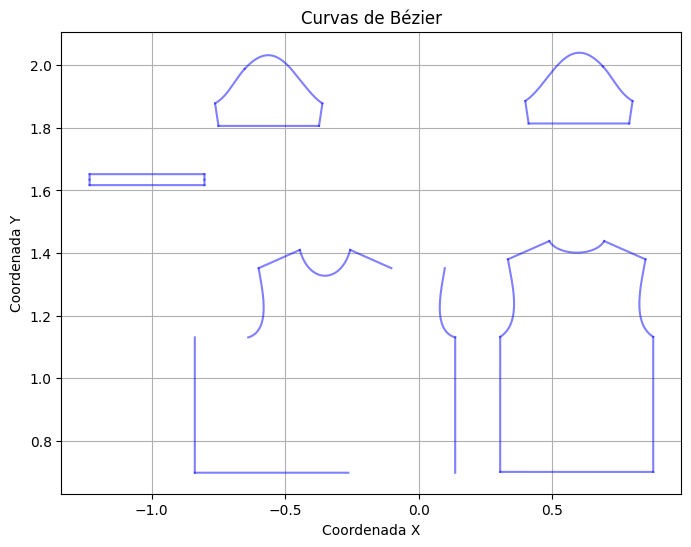

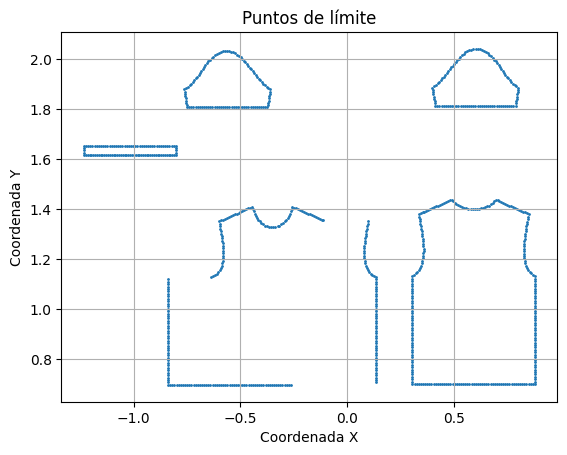

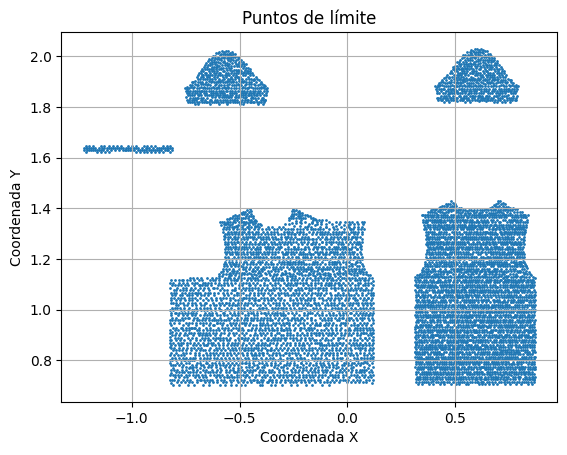

In [13]:


# Suponiendo que pom_C0 y pom_C1 son objetos Coordinates con coordenadas numéricas
pom_C0_tensor = torch.tensor([pom_C0.x, pom_C0.y])
pom_C1_tensor = torch.tensor([pom_C1.x, pom_C1.y])
pom_orientation =torch.tensor(1.)
print(pom_C0_tensor,pom_C1_tensor,pom_orientation)

pom_piece = poms[0]['POM'][0][0]['piece']

for index, garment_id in enumerate(pieces_bezierPath):
    if garment_id['garmentPiece_id'] == pom_piece:
        pom_garmentid_index= index
        break
pom_sewLine_nodes = [poms[0]['POM'][0][0]['nodes']['sewLine'][0],poms[0]['POM'][0][0]['nodes']['sewLine'][1],poms[0]['POM'][1][0]['nodes']['sewLine'][0],poms[0]['POM'][1][0]['nodes']['sewLine'][1]]
print(pom_sewLine_nodes)
pieces_bezierPath_tensor = copy.deepcopy(pieces_bezierPath)


all_curve_points_tensor, all_curve_points_index = bezier_curves_tensor(pieces_bezierPath_tensor) 



pom_sewLine_nodes_tensor = torch.tensor(pom_sewLine_nodes)
# Convertir tensores a arrays numpy
all_curve_points_index_np = all_curve_points_index.numpy()
pom_sewLine_nodes_tensor_np = pom_sewLine_nodes_tensor.numpy()

# Inicializar una lista para almacenar los índices coincidentes
indices_coincidentes = []
print(pom_sewLine_nodes)
# Recorrer los índices en all_curve_points_index
for i, indice in enumerate(all_curve_points_index_np):
    # Verificar si el índice está en pom_sewLine_nodes_tensor
    indices_puntos_coincidentes=[]
    print(indice)
    for j, indice2 in enumerate(indice):
        if(indice2[0]==pom_garmentid_index):
            if(indice2[1]==pom_sewLine_nodes_tensor_np[0] or indice2[1]==pom_sewLine_nodes_tensor_np[1] ):
                indices_puntos_coincidentes.append(-1)
            elif(indice2[1]==pom_sewLine_nodes_tensor_np[2] or indice2[1]==pom_sewLine_nodes_tensor_np[3] ):
                indices_puntos_coincidentes.append(1)

            else:
                indices_puntos_coincidentes.append(0)

        else:
            indices_puntos_coincidentes.append(0)

    indices_coincidentes.append(indices_puntos_coincidentes)



print(indices_coincidentes)

# Convertir la lista de índices a un tensor
indices_coincidentes_tensor = torch.tensor(indices_coincidentes)

# Ahora tienes un tensor con los índices que coinciden





def fbezier(dif, all_curve_points_tensor):

    #despX, despY = calcular_desplazamiento_tensor(pom_C0_tensor,pom_C1_tensor,pom_orientation,dif) 
    #print("desp",despX, despY)
    # Desplazamiento solo en el eje x
    all_curve_points_tensor[:, :, 0] += indices_coincidentes_tensor * dif

    return all_curve_points_tensor


def fboundary(bezier_curvv_points_tensor):
    return compute_tensor_boundary_point_tensor(bezier_curvv_points_tensor,boundary_vertex_segment_t_tensor)


def fvertex(boundary_points_tensor):
    new_vertex_points = []
    for i in range(8068):
        recalculated_point_index = nearest_boundary_vertex_array_tensor[i].long()  # No es necesario convertir a lista
        recalculated_point = bilinear_interpolation_tensor(boundary_points_tensor[recalculated_point_index], weights_array_tensor[i])
        new_vertex_points.append(recalculated_point)

    return torch.stack(new_vertex_points)

pom_dif = torch.tensor([0.2])


new_pieces_bezierPath_tensor= fbezier(pom_dif,all_curve_points_tensor)
new_boundary_points_tensor= fboundary(new_pieces_bezierPath_tensor)
new_vertex_points_tensor= fvertex(new_boundary_points_tensor)


# Visualizar los puntos de las curvas de Bézier
plt.figure(figsize=(8, 6))

for curve_points in new_pieces_bezierPath_tensor:
    curve_points = curve_points.numpy()  # Convertir tensor a array de NumPy
    plt.plot(curve_points[:, 0], curve_points[:, 1], color='blue', alpha=0.5)

plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Curvas de Bézier')
plt.grid(True)
plt.show()


boundary_points__tensor_array = new_boundary_points_tensor.numpy()
# Extraer las coordenadas x e y
x = boundary_points__tensor_array[:, 0]
y = boundary_points__tensor_array[:, 1]

# Graficar los puntos
plt.scatter(x, y,s=1)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Puntos de límite')
plt.grid(True)
plt.show()

new_vertex_points__tensor_array = new_vertex_points_tensor.numpy()
# Extraer las coordenadas x e y
x = new_vertex_points__tensor_array[:, 0]
y = new_vertex_points__tensor_array[:, 1]

# Graficar los puntos
plt.scatter(x, y,s=1)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Puntos de límite')
plt.grid(True)
plt.show()



In [14]:
#OPTIMIZACION


import torch



original_pieces_2d = []
for piece_data in pieces_positions2d:
    position2d = piece_data['position2D']
    for i in range(0, len(position2d), 2):
        x = position2d[i]
        y = position2d[i + 1]
        original_pieces_2d.append(torch.tensor([x, y]))

original_pieces_2d_tensor=torch.stack(original_pieces_2d)
print(pieces_indices)
pieces_indices_tensor =  torch.tensor(pieces_indices)

def cost_function_tensor(strain, target):
    return torch.sum((strain - target) ** 2)


def compute_total_strain_tensor(lengths1, lengths2):
    edge_total_strain = []
    for edge_lengths2, edge_lengths1 in zip(lengths2,lengths1):
        edge_strain = compute_edge_strain(edge_lengths2, edge_lengths1)
        edge_total_strain.append(edge_strain)
    return torch.tensor(edge_total_strain, requires_grad=True)


def compute_edge_lengths_tensor(points, indices):
    edge_lengths = []
    for i in range(0, len(indices), 3):
        # Obtener los índices de los puntos que forman el triángulo
        p1_index, p2_index, p3_index = indices[i], indices[i+1], indices[i+2]

        # Obtener las posiciones 3D de los puntos del triángulo
        p1 = points[p1_index]
        p2 = points[p2_index]
        p3 = points[p3_index]

        # Calcular la longitud de cada arista usando torch.norm
        edge_ab = torch.norm(p2 - p1)
        edge_bc = torch.norm(p3 - p2)
        edge_ca = torch.norm(p1 - p3)

        edge_lengths.append(edge_ab)
        edge_lengths.append(edge_bc)
        edge_lengths.append(edge_ca)

    return torch.tensor(edge_lengths)

# Vuelvo a definir el pom inicial, pero ahora le digo que quiero que calcule gradientes, para poder hacer la optimización
"""
optimized_pom = torch.tensor([0.], requires_grad=True)

original_edge_length = compute_edge_lengths_tensor(original_pieces_2d_tensor, pieces_indices_tensor)

# Convertir las matrices NumPy en tensores de PyTorch
avatar1_edge_lengths_tensor = torch.tensor(avatar1_edge_lengths, dtype=torch.float32)
avatar2_edge_lengths_tensor = torch.tensor(avatar2_edge_lengths, dtype=torch.float32)

# Calcular target_strain utilizando la función compute_total_strain_tensor
target_strain_tensor = compute_total_strain_tensor(avatar2_edge_lengths_tensor,avatar1_edge_lengths_tensor)
# Se define el optimizador

optimizer = torch.optim.Adam([optimized_pom], 1e-3) #1e-2 learning rate


# Vamos a hacer 500 pasos de optimización. En el caso real, habría que hacer iteraciones hasta llegar a convergencia, por ejemplo,

# hasta que los poms apenas cambien después de varias iteraciones.
losses =[]
for i in range(5):

    optimizer.zero_grad()

    # Se calcula la función de coste desde el POM hasta la loss

    new_pieces_bezierPath_tensor= fbezier(optimized_pom,all_curve_points_tensor)
    new_boundary_points_tensor= fboundary(new_pieces_bezierPath_tensor)
    new_vertex_points_tensor= fvertex(new_boundary_points_tensor)
    
    e_length = compute_edge_lengths_tensor(new_vertex_points_tensor, pieces_indices_tensor)
    
    strain = compute_total_strain_tensor(e_length, original_edge_length)

    loss = cost_function_tensor(strain, target_strain_tensor)

    losses.append(loss.item()) 

    print(f"Step # {i}, loss: {loss.item()}, pom: {optimized_pom.item()}")

    # Se calculan los gradientes y se propagan hacia atrás

    loss.backward()
    print(optimized_pom.grad)


    # Se da un paso de optimización
    print("optimized_pom",optimized_pom)
    optimizer.step()
    print("optimizer.step")
    print("optimized_pom",optimized_pom)

print(losses)
plt.plot(range(5), losses)
plt.xlabel('Número de iteraciones')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()
"""

[ 46  47  48 ... 182 652 388]


'\noptimized_pom = torch.tensor([0.], requires_grad=True)\n\noriginal_edge_length = compute_edge_lengths_tensor(original_pieces_2d_tensor, pieces_indices_tensor)\n\n# Convertir las matrices NumPy en tensores de PyTorch\navatar1_edge_lengths_tensor = torch.tensor(avatar1_edge_lengths, dtype=torch.float32)\navatar2_edge_lengths_tensor = torch.tensor(avatar2_edge_lengths, dtype=torch.float32)\n\n# Calcular target_strain utilizando la función compute_total_strain_tensor\ntarget_strain_tensor = compute_total_strain_tensor(avatar2_edge_lengths_tensor,avatar1_edge_lengths_tensor)\n# Se define el optimizador\n\noptimizer = torch.optim.Adam([optimized_pom], 1e-3) #1e-2 learning rate\n\n\n# Vamos a hacer 500 pasos de optimización. En el caso real, habría que hacer iteraciones hasta llegar a convergencia, por ejemplo,\n\n# hasta que los poms apenas cambien después de varias iteraciones.\nlosses =[]\nfor i in range(5):\n\n    optimizer.zero_grad()\n\n    # Se calcula la función de coste desde el P

In [15]:
def costo(x):
    # Calcula el costo en función de x
    return (x - 3) ** 2  # Ejemplo de función de costo

def derivada_costo(x):
    # Calcula la derivada del costo en función de x
    return 2 * (x - 3)  # Derivada de la función de costo de ejemplo

def optimizar_x(learning_rate, num_iter):
    x = 0.1  # Valor inicial para x
    for _ in range(num_iter):


        new_pieces_bezierPath_tensor= fbezier(optimized_pom,all_curve_points_tensor)
        new_boundary_points_tensor= fboundary(new_pieces_bezierPath_tensor)
        new_vertex_points_tensor= fvertex(new_boundary_points_tensor)
        
        e_length = compute_edge_lengths_tensor(new_vertex_points_tensor, pieces_indices_tensor)
        
        strain = compute_total_strain_tensor(e_length, original_edge_length)

        loss = cost_function_tensor(strain, target_strain_tensor)


        costo_actual = costo(x)  # Calcula el costo actual
        derivada_actual = derivada_costo(x)  # Calcula la derivada del costo en x
        x = x - learning_rate * derivada_actual  # Actualiza el valor de x
    return x

# Parámetros del algoritmo
learning_rate = 0.1
num_iter = 100

# Ejecuta el algoritmo de optimización
x_optimo = optimizar_x(learning_rate, num_iter)
print("Valor óptimo encontrado para x:", x_optimo)
print("Valor de la función de costo en el punto óptimo:", costo(x_optimo))


NameError: name 'optimized_pom' is not defined

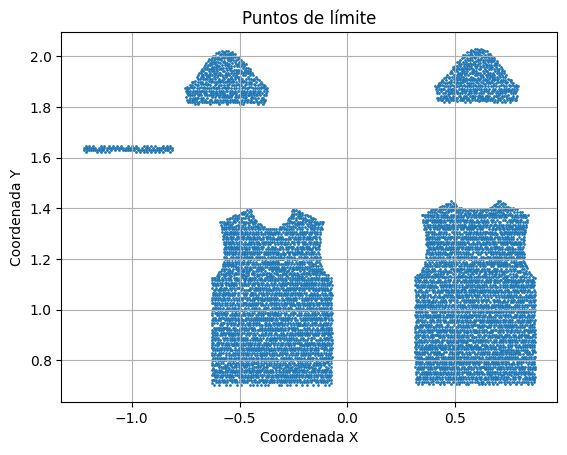

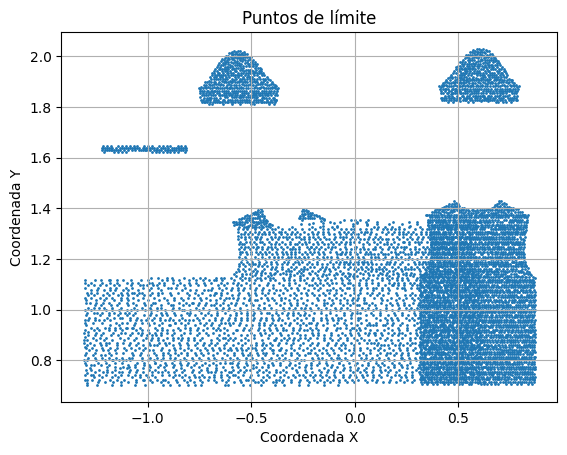

25594
0 tensor([0.])


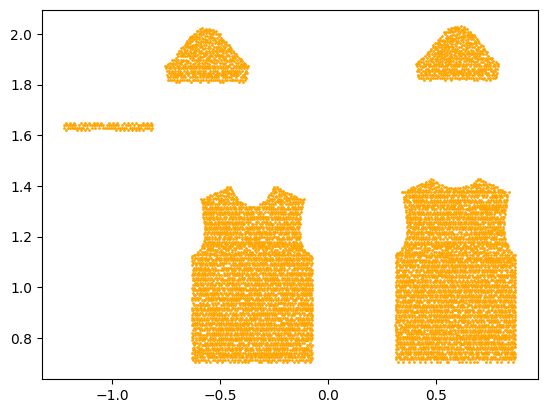

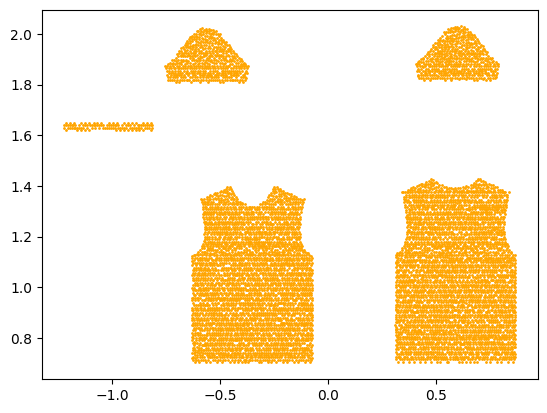

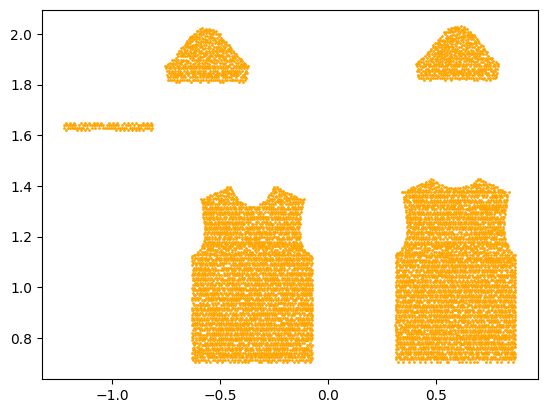

1 tensor([0.5836])


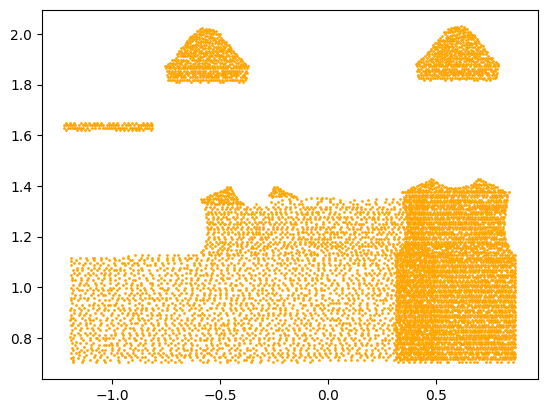

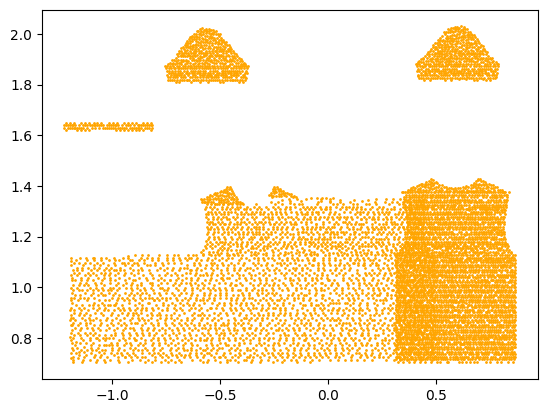

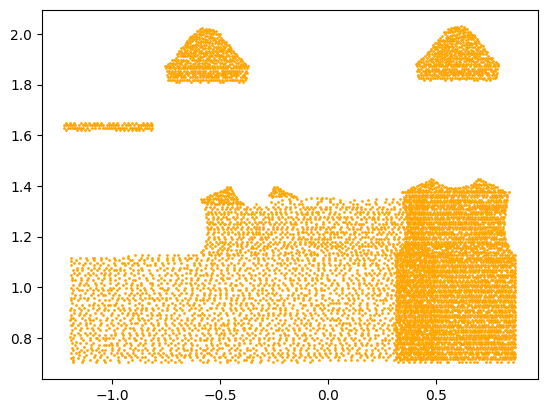

2 tensor([0.5514])


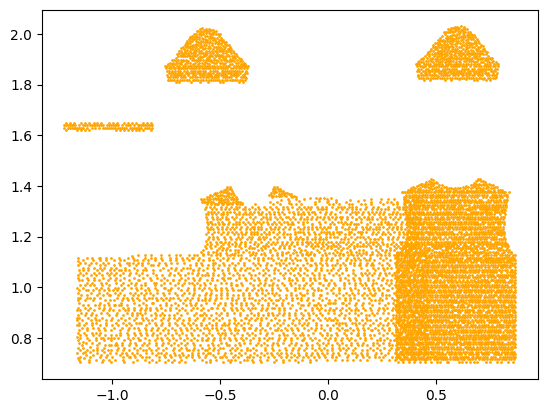

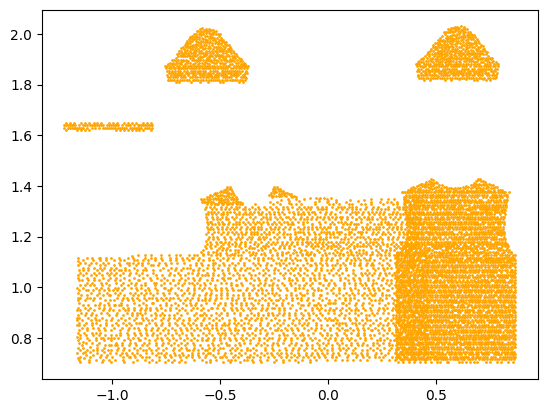

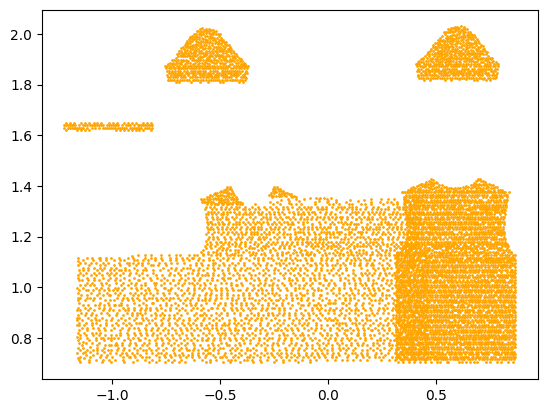

3 tensor([0.5204])


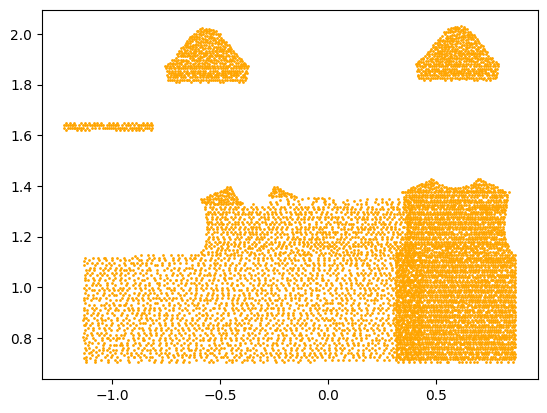

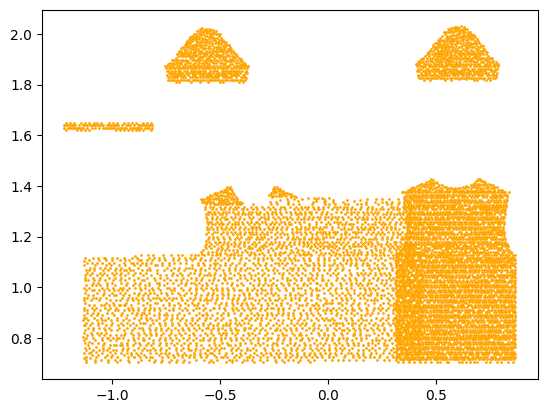

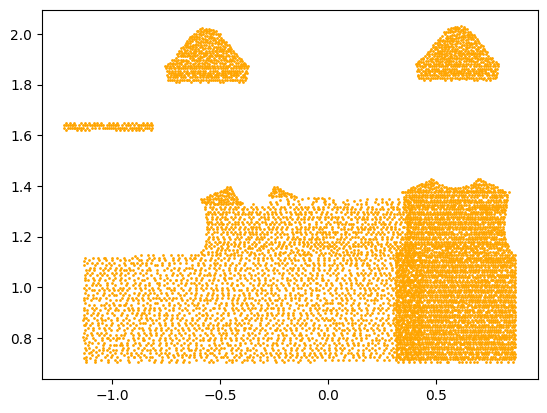

4 tensor([0.4913])


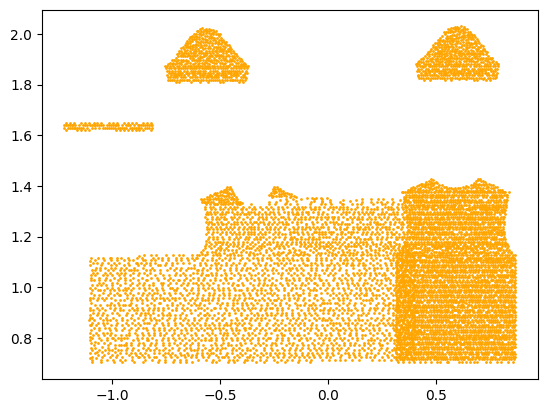

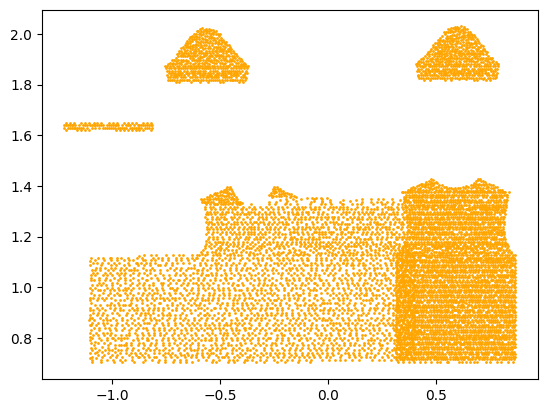

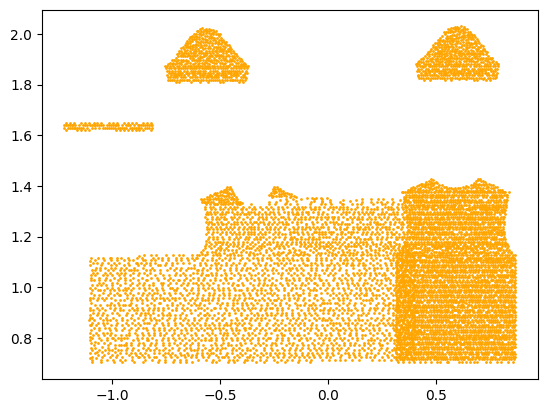

Optimized POM: tensor([0.4641])


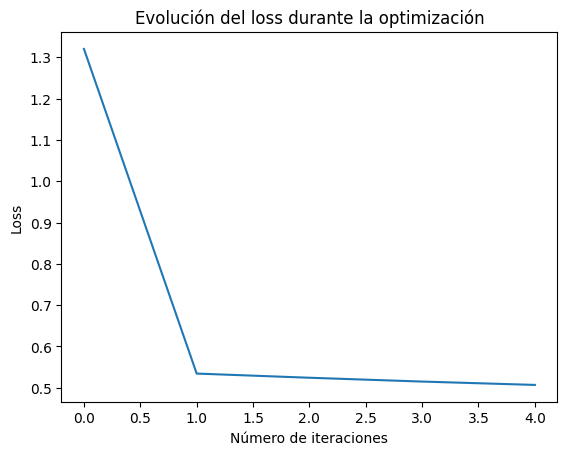

In [19]:
import numpy as np

all_curve_points_tensor, all_curve_points_index = bezier_curves_tensor(pieces_bezierPath_tensor) 

strain=[]
new_pieces_bezierPath=[]
new_boundary_points=[]
new_vertex_points=[]
original_edge_length = compute_edge_lengths_tensor(original_pieces_2d_tensor, pieces_indices_tensor)
pieces_indices_tensor =  torch.tensor(pieces_indices)

target_strain_tensor = torch.tensor(target_strain)


original_pieces_bezierPath_tensor= fbezier(torch.tensor([0.]),all_curve_points_tensor)
original_boundary_points_tensor= fboundary(original_pieces_bezierPath_tensor)
original_vertex_points_tensor= fvertex(original_boundary_points_tensor)

original_edge_vertex_lengths = compute_edge_lengths_tensor(original_vertex_points_tensor,pieces_indices)
original_vertex_points__tensor_array = original_vertex_points_tensor.detach().numpy()
# Extraer las coordenadas x e y
x = original_vertex_points__tensor_array[:, 0]
y = original_vertex_points__tensor_array[:, 1]

# Graficar los puntos
plt.scatter(x, y,s=1)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Puntos de límite')
plt.grid(True)
plt.show()

new_pieces_bezierPath_tensor= fbezier(torch.tensor([0.7]),all_curve_points_tensor)
new_boundary_points_tensor= fboundary(new_pieces_bezierPath_tensor)
new_vertex_points_tensor= fvertex(new_boundary_points_tensor)

edge_vertex_lengths = compute_edge_lengths_tensor(new_vertex_points_tensor,pieces_indices)

edge_vertex_lengths_array = np.array(edge_vertex_lengths)
original_edge_vertex_lengths_array = np.array(original_edge_vertex_lengths)
strain = compute_total_strain_tensor(edge_vertex_lengths, original_edge_length).detach()

new_vertex_points__tensor_array = new_vertex_points_tensor.detach().numpy()
# Extraer las coordenadas x e y
x = new_vertex_points__tensor_array[:, 0]
y = new_vertex_points__tensor_array[:, 1]

# Graficar los puntos
plt.scatter(x, y,s=1)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Puntos de límite')
plt.grid(True)
plt.show()
# Calcula la diferencia entre los arrays
difference = np.abs(edge_vertex_lengths_array - original_edge_vertex_lengths_array)

# Imprime los índices y los valores donde hay cambios significativos
threshold = 0.25 # Define un umbral para considerar un cambio significativo
changed_indices = np.where(difference >threshold)[0]

print(len(changed_indices))
changed_values = difference[changed_indices]
changed_indices_tensor = torch.tensor(changed_indices)

# Supongamos que fbezier, fboundary, fvertex, compute_edge_lengths y compute_total_strain son funciones que ya tienes definidas

# Función para calcular el costo
def cost_function2(optimized_pom,all_curve_points_tensor, pieces_indices_tensor, original_edge_length, target_strain_tensor):
    all_curve_points_tensor, all_curve_points_index = bezier_curves_tensor(pieces_bezierPath_tensor) 
    new_pieces_bezierPath = fbezier(optimized_pom,all_curve_points_tensor)
    new_boundary_points = fboundary(new_pieces_bezierPath)
    new_vertex_points = fvertex(new_boundary_points)
    recalculated2_vertex_points_x = [point[0] for point in new_vertex_points]
    recalculated2_vertex_points_y = [point[1] for point in new_vertex_points]

        # Dibuja los puntos originales y recalculados
    plt.scatter(recalculated2_vertex_points_x, recalculated2_vertex_points_y, color='orange',s=1, label='Puntos recalculados')
    plt.show()
    e_length = compute_edge_lengths_tensor(new_vertex_points, pieces_indices_tensor)
    strain = compute_total_strain_tensor(e_length, original_edge_length).detach()

    strain_changed_tensor = strain[changed_indices_tensor]
    target_strain_changed_tensor = target_strain[changed_indices_tensor]
    return torch.mean((strain_changed_tensor - target_strain_changed_tensor) ** 2)

def optimize_pom(initial_pom,all_curve_points_tensor, pieces_indices_tensor, original_edge_length, target_strain_tensor, learning_rate, num_iterations):
    optimized_pom = initial_pom  # No necesitas hacer una copia si optimized_pom es un escalar
    losses = []

    for _ in range(num_iterations):
        print(_,optimized_pom)
        all_curve_points_tensor, all_curve_points_index = bezier_curves_tensor(pieces_bezierPath_tensor) 

        loss = cost_function2(optimized_pom,all_curve_points_tensor, pieces_indices_tensor, original_edge_length, target_strain_tensor)
        losses.append(loss)

        # Calcula el gradiente utilizando la diferencia finita
        epsilon = 1e-6
        perturbation = epsilon
        loss_positive = cost_function2(optimized_pom + perturbation, all_curve_points_tensor, pieces_indices_tensor, original_edge_length, target_strain_tensor)
        loss_negative = cost_function2(optimized_pom - perturbation, all_curve_points_tensor, pieces_indices_tensor, original_edge_length, target_strain_tensor)

        grad = (loss_positive - loss_negative) / (2 * epsilon)

        # Actualiza optimized_pom utilizando el gradiente descendente
        optimized_pom -= learning_rate * grad

    return optimized_pom, losses

# Parámetros
initial_pom = torch.tensor([0.])  # Inicializa initial_pom como un escalar
learning_rate = 0.1
num_iterations = 5

# Optimiza optimized_pom
optimized_pom, losses = optimize_pom(initial_pom, all_curve_points_tensor,pieces_indices_tensor, original_edge_length, target_strain_tensor, learning_rate, num_iterations)
print("Optimized POM:", optimized_pom)



# Grafica el loss
plt.plot(range(num_iterations), losses)
plt.xlabel('Número de iteraciones')
plt.ylabel('Loss')
plt.title('Evolución del loss durante la optimización')
plt.show()

In [ ]:
# Función para calcular el costo
def cost_function2(optimized_pom, all_curve_points_tensor, pieces_indices_tensor, original_edge_length, target_strain_tensor):
    all_curve_points_tensor, all_curve_points_index = bezier_curves_tensor(pieces_bezierPath_tensor) 
    new_pieces_bezierPath = fbezier(optimized_pom, all_curve_points_tensor)
    new_boundary_points = fboundary(new_pieces_bezierPath)
    new_vertex_points = fvertex(new_boundary_points)
    e_length = compute_edge_lengths_tensor(new_vertex_points, pieces_indices_tensor)
    strain = compute_total_strain_tensor(e_length, original_edge_length)
    strain_changed_tensor = strain[changed_indices_tensor]
    target_strain_changed_tensor = target_strain_tensor[changed_indices_tensor]
    return torch.mean((strain_changed_tensor - target_strain_changed_tensor) ** 2)

# Función para optimizar optimized_pom
def optimize_pom(initial_pom, all_curve_points_tensor, pieces_indices_tensor, original_edge_length, target_strain_tensor, learning_rate, num_iterations):
    optimized_pom = initial_pom.clone().requires_grad_()  # Inicializa como tensor y requiere gradiente
    losses = []

    for _ in range(num_iterations):
        optimizer.zero_grad()  # Reinicia los gradientes

        loss = cost_function2(optimized_pom, all_curve_points_tensor, pieces_indices_tensor, original_edge_length, target_strain_tensor)
        losses.append(loss.item())

        loss.backward()  # Calcula los gradientes

        optimizer.step()  # Actualiza los parámetros

    return optimized_pom, losses

# Parámetros
initial_pom = torch.tensor([0.], requires_grad=True)  # Inicializa como tensor y requiere gradiente
learning_rate = 0.001
num_iterations = 10

# Optimizador
optimizer = torch.optim.SGD([initial_pom], lr=learning_rate)

# Optimiza optimized_pom
optimized_pom, losses = optimize_pom(initial_pom, all_curve_points_tensor, pieces_indices_tensor, original_edge_length, target_strain_tensor, learning_rate, num_iterations)
print("Optimized POM:", optimized_pom.detach().numpy())

# Grafica el loss
plt.plot(range(num_iterations), losses)
plt.xlabel('Número de iteraciones')
plt.ylabel('Loss')
plt.title('Evolución del loss durante la optimización')
plt.show()


In [17]:
print(losses)

[tensor(0.4626, dtype=torch.float64), tensor(0.4493, dtype=torch.float64), tensor(0.4166, dtype=torch.float64), tensor(0.4059, dtype=torch.float64), tensor(0.4056, dtype=torch.float64)]
